In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
 
data = pd.read_csv("../input/ml-kickoff-competition/train.csv")
data.shape
 
data.head()


,total_bill,tip,sex,smoker,day,time,size
0,11.35,2.50,Female,Yes,Fri,Dinner,2
1,12.60,1.00,Male,Yes,Sat,Dinner,2
2,29.85,5.14,Female,No,Sun,Dinner,5
3,17.81,2.34,Male,No,Sat,Dinner,4
4,27.20,4.00,Male,No,Thur,Lunch,4


In [2]:
data.describe()

,total_bill,tip,size
count,195.000000,195.000000,195.000000
mean,19.963128,3.030564,2.630769
std,8.805755,1.379476,1.008764
min,3.070000,1.000000,1.000000
25%,13.420000,2.000000,2.000000
50%,17.890000,3.000000,2.000000
75%,24.395000,3.695000,3.000000
max,48.330000,9.000000,6.000000


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


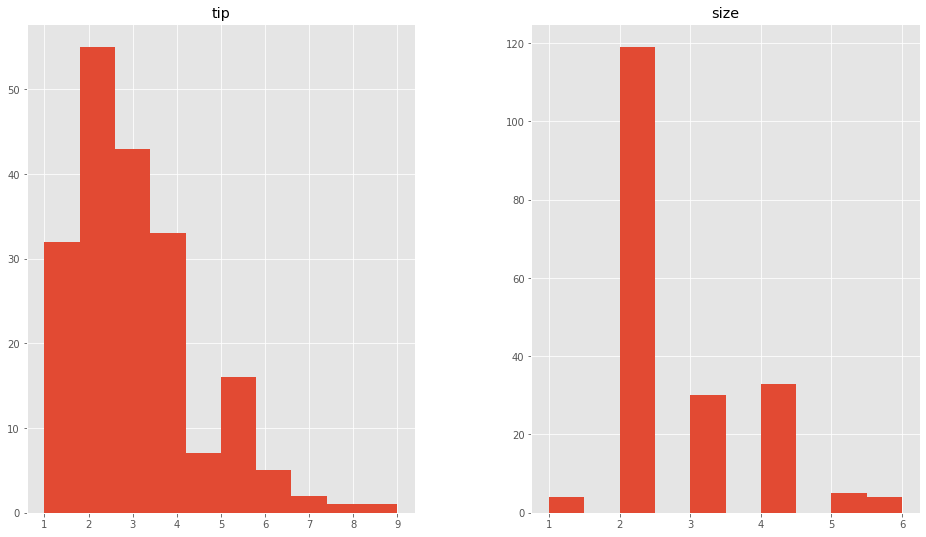

In [3]:
data.drop(['total_bill'],1).hist()
plt.show()

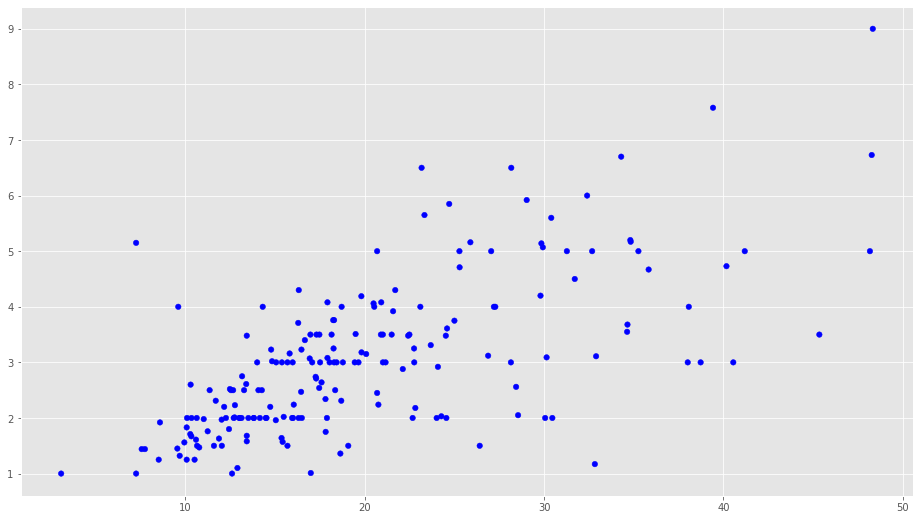

In [4]:
filtered_data = data[(data['total_bill'] <= 50) & (data['tip'] > 0)]
 
colores=['orange','blue']
tamanios=[30,60]
 
f1 = filtered_data['total_bill'].values
f2 = filtered_data['tip'].values
 
# Vamos a pintar en colores los puntos por debajo y por encima de la media de Cantidad de Palabras
asignar=[]
for index, row in filtered_data.iterrows():
    if(row['total_bill']>50):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

In [5]:
dataX =filtered_data[["total_bill"]]
X_train = np.array(dataX)
y_train = filtered_data['tip'].values
 
# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()
 
# Entrenamos nuestro modelo
regr.fit(X_train, y_train)
 
# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)
 
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))

Coefficients: 
 [0.10429238]
Independent term: 
 0.9485620339509042
Mean squared error: 1.05
Variance score: 0.44
